

# **Histogram Representations**

1. View the RGB Histogram representations of images
2. Use K-Means Clustering to get the dominant colors and their proportions in images


In [4]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

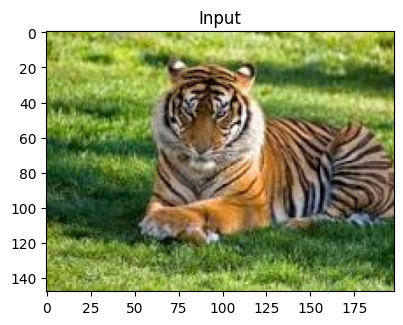

In [5]:
image = cv2.imread('tiger.jpg')
imshow("Input", image)

<ipython-input-6-023e1adafde4>:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0, 256])   # image.ravel() flattens the 2D/3D array into a 1D array. 256 bins (0-255 intensity values).


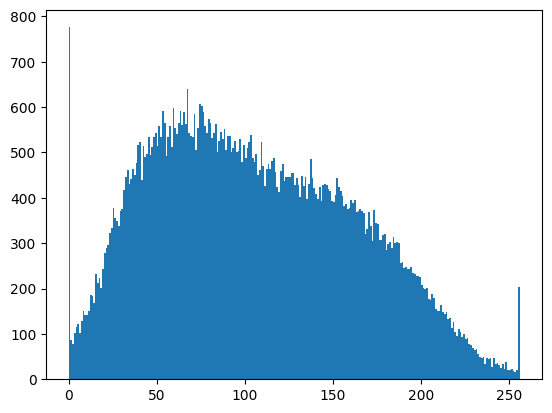

In [6]:
# We plot a histogram
plt.hist(image.ravel(), 256, [0, 256])   # image.ravel() flattens the 2D/3D array into a 1D array. 256 bins (0-255 intensity values).
plt.show()

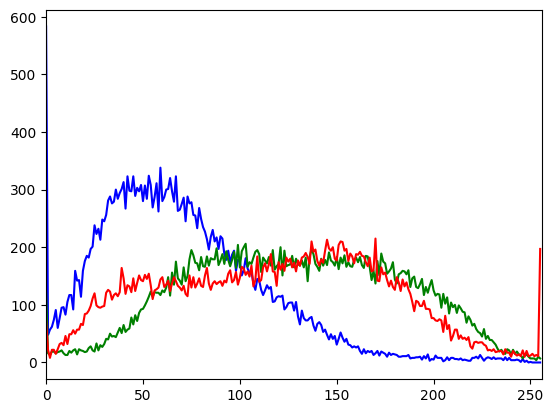

In [7]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])

plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.
- **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- **ranges** : this is our RANGE. Normally, it is [0,256].

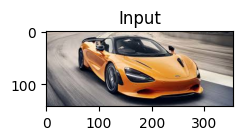

In [8]:
image = cv2.imread('car.jpg')
imshow("Input", image)

<ipython-input-11-01f3cf75bd5c>:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0, 256])


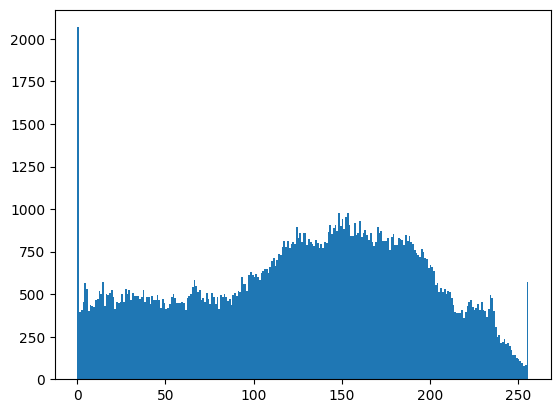

In [11]:
# We plot a histogram, ravel() flatens our image array
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

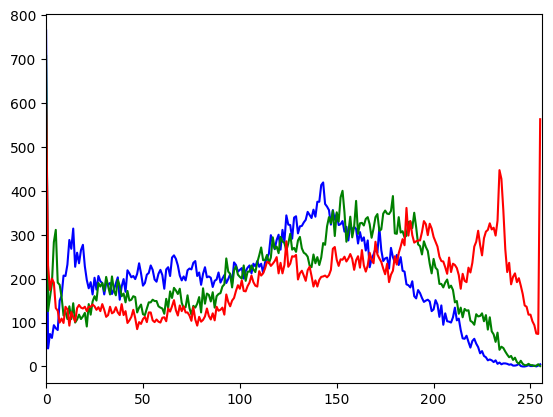

In [12]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])

plt.show()

## **K-Means Clustering to obtain the dominant colors in an image**

In [19]:
def centroidHistogram(clt):
    # Create a histrogram for the clusters based on the pixels in each cluster
    # Get the labels for each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)

    # Create our histogram
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, so that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plotColors(hist, centroids):
    h = 100
    w = 400
    bar = np.zeros((h, w, 3), dtype = "uint8")  #blank image (color bar) of size 100x500 pixels with 3 color channels (RGB).

    x_start = 0
    # iterate over the percentage and dominant color of each cluster
    for (percent, color) in zip(hist, centroids):
      # plot the relative percentage of each cluster
      end = x_start + (percent * w)
      cv2.rectangle(bar, (int(x_start), 0), (int(end), 100),
        color.astype("uint8").tolist(), -1)
      x_start = end
    return bar

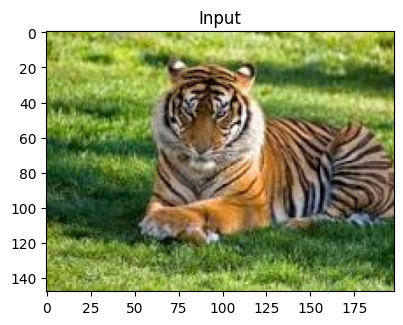

(148, 198, 3)
(29304, 3)


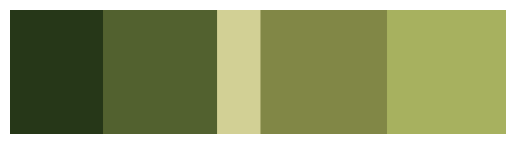

In [20]:
from sklearn.cluster import KMeans

image = cv2.imread('tiger.jpg')
imshow("Input", image)

# We reshape our image into a list of RGB pixels for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3)) #(height, width, 3) → (total_pixels, 3)
print(image.shape)

number_of_clusters = 5
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

### **Let's try another image**

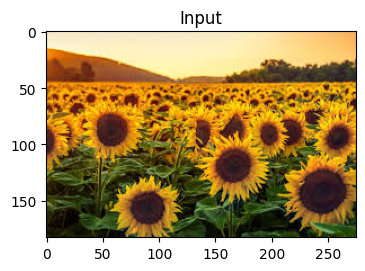

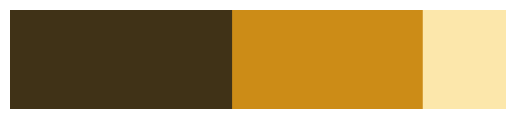

In [16]:
from sklearn.cluster import KMeans

image = cv2.imread('sunflowers.jpeg')
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

number_of_clusters = 3
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

 flattens the image into a 2D array, where each row represents a single pixel’s RGB color.

 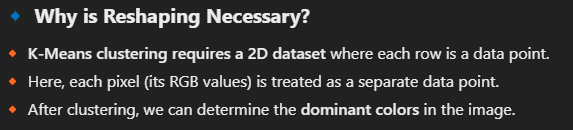